In [1]:
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.models import Sequential  
from keras.layers import Dense, Activation, Conv2D  
from keras.layers import MaxPool2D, Flatten, Dropout, ZeroPadding2D, BatchNormalization  
from keras.utils import np_utils  
import keras
from keras.models import save_model, load_model  
from keras.models import Model
np.random.seed(10)

TensorFlow version: 1.5.0


Using TensorFlow backend.


In [2]:
train = pd.read_csv('training_set.csv', header=None, sep=',')
print('dataset shape {}'.format(train.shape))
train.head()

dataset shape (8065, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,5.347435,4.363681,1.501913,5.258967,4.319263,1.488703,5.037871,1.618295,1.778350,5.062803,4.229656,1.772577,4.972902,4.301065,1.564781,5.553945,4.370456,1.553521,1
1,4.869622,4.254210,1.556133,5.240113,4.346338,1.554309,5.037610,1.618370,1.778573,5.061430,4.228504,1.772859,4.974908,4.303656,1.565527,5.423875,4.303708,1.569942,1
2,5.357447,4.364039,1.500969,5.238928,4.347924,1.554150,5.037514,1.618298,1.778774,5.059245,4.228004,1.773568,4.981612,4.305363,1.563643,5.332170,4.438061,1.572841,1
3,4.942886,4.281878,1.546513,5.111436,4.229660,1.527091,5.037526,1.618612,1.778855,5.056475,4.226891,1.774519,4.987158,4.304063,1.565929,5.311104,4.396774,1.566368,1
4,5.003160,4.278530,1.542866,4.985812,4.182155,1.520330,5.037557,1.619226,1.778925,5.052367,4.225485,1.775536,4.983912,4.296833,1.569889,5.193762,4.335417,1.560144,1


shape of X (8065, 18); shape of y (8065,)


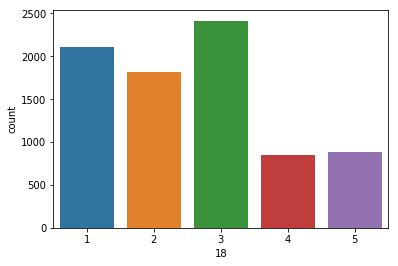

3    2415
1    2106
2    1817
5     879
4     848
Name: 18, dtype: int64


In [3]:
X_train = train.iloc[:, 0:18]
y_train = train.iloc[:, 18]
print('shape of X {}; shape of y {}'.format(X_train.shape, y_train.shape))

# 绘制计数直方图
sns.countplot(y_train)
plt.show()
# 使用pd.Series.value_counts()
print(y_train.value_counts())

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [5]:
X_train_scaled[:5], y_train[:10]

(array([[ 0.66344395,  0.23293556, -0.63988571,  0.0133496 ,  0.32715843,
         -0.6083054 ,  0.39542515, -0.68226809, -0.61106817,  0.48562327,
         -0.30825689, -0.85456673,  0.63300726,  0.26075035, -0.62375517,
          0.10890193,  0.41065869, -0.56213672],
        [ 0.51480911,  0.18300911, -0.57860515,  0.00769185,  0.33685623,
         -0.52972621,  0.39530096, -0.68222755, -0.61069785,  0.48487524,
         -0.31025339, -0.85403441,  0.63367011,  0.26214159, -0.6228765 ,
          0.06616585,  0.38347532, -0.5413967 ],
        [ 0.66655841,  0.23309884, -0.64095264,  0.00733625,  0.3374243 ,
         -0.52991665,  0.39525528, -0.68226647, -0.61036408,  0.48368482,
         -0.31111993, -0.85269606,  0.63588532,  0.26305816, -0.62509555,
          0.03603506,  0.43819108, -0.53773521],
        [ 0.53759958,  0.19562766, -0.58947787, -0.0309218 ,  0.29506421,
         -0.5623264 ,  0.39526099, -0.68209674, -0.61022957,  0.48217568,
         -0.31304884, -0.85090089,  0.6

In [6]:
y_trainOneHot = np_utils.to_categorical(y_train)

In [7]:
y_trainOneHot[:15]

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [8]:
model = Sequential()

In [9]:
model.add(Dense(units=50, input_dim=18, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=18, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=12, kernel_initializer='normal', activation='relu'))

In [10]:
model.add(Dense(units=6, kernel_initializer='normal', activation='softmax'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                950       
_________________________________________________________________
dense_2 (Dense)              (None, 18)                918       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                228       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 78        
Total params: 2,174
Trainable params: 2,174
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [24]:
train_history = model.fit(x=X_train_scaled, y=y_trainOneHot, validation_split=0.05,
                          epochs=50, batch_size=10, verbose=2)

Train on 7661 samples, validate on 404 samples
Epoch 1/50
 - 3s - loss: 0.8597 - acc: 0.6668 - val_loss: 3.1915 - val_acc: 0.3936
Epoch 2/50
 - 3s - loss: 0.8462 - acc: 0.6737 - val_loss: 3.0245 - val_acc: 0.4084
Epoch 3/50
 - 3s - loss: 0.8387 - acc: 0.6728 - val_loss: 2.7272 - val_acc: 0.4109
Epoch 4/50
 - 3s - loss: 0.8361 - acc: 0.6760 - val_loss: 2.9377 - val_acc: 0.3985
Epoch 5/50
 - 3s - loss: 0.8285 - acc: 0.6802 - val_loss: 2.9265 - val_acc: 0.3936
Epoch 6/50
 - 3s - loss: 0.8230 - acc: 0.6803 - val_loss: 2.8568 - val_acc: 0.3936
Epoch 7/50
 - 3s - loss: 0.8201 - acc: 0.6802 - val_loss: 2.9433 - val_acc: 0.3936
Epoch 8/50
 - 3s - loss: 0.8151 - acc: 0.6789 - val_loss: 2.9377 - val_acc: 0.3787
Epoch 9/50
 - 3s - loss: 0.8114 - acc: 0.6798 - val_loss: 3.1868 - val_acc: 0.3861
Epoch 10/50
 - 3s - loss: 0.8083 - acc: 0.6842 - val_loss: 2.6623 - val_acc: 0.4282
Epoch 11/50
 - 3s - loss: 0.8026 - acc: 0.6836 - val_loss: 3.0720 - val_acc: 0.3985
Epoch 12/50
 - 3s - loss: 0.7944 - acc

In [25]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

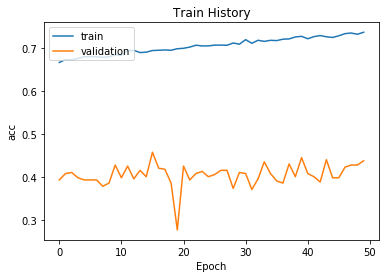

In [26]:
show_train_history(train_history, 'acc', 'val_acc')

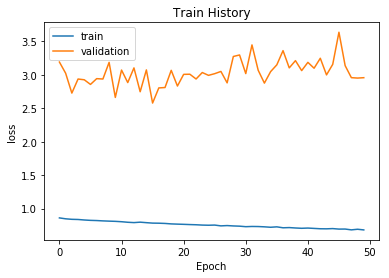

In [27]:
show_train_history(train_history, 'loss', 'val_loss')

In [28]:
scores = model.evaluate(X_train_scaled, y_trainOneHot)
print()
print('accuracy=',scores[1])

8065/8065 [==============================] - 0s 45us/step

accuracy= 0.7283323000619962


In [29]:
test = pd.read_csv('testing_set.csv', header=None, sep=',')
print('dataset shape {}'.format(test.shape))
test.head()

dataset shape (1834, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2.287678,4.711127,2.226552,2.994055,4.464313,2.287253,2.373635,0.868547,2.406962,2.487050,3.476750,2.430243,1.946558,4.519551,2.247933,3.224442,4.237915,2.333757,1
1,2.287676,4.711183,2.226562,2.993737,4.464233,2.287362,2.373502,0.868628,2.406994,2.486847,3.476661,2.430296,1.946477,4.519677,2.247939,3.224355,4.237834,2.333824,1
2,2.287688,4.711247,2.226575,2.993438,4.464146,2.287472,2.373369,0.868708,2.407027,2.486685,3.476560,2.430351,1.946404,4.519819,2.247944,3.224269,4.237745,2.333894,1
3,2.287693,4.711304,2.226588,2.993355,4.463484,2.287634,2.373212,0.868756,2.407066,2.486516,3.476461,2.430404,1.946334,4.519930,2.247949,3.224345,4.236684,2.334085,1
4,2.287505,4.711247,2.226628,2.993353,4.462631,2.287822,2.373061,0.868795,2.407109,2.486380,3.476376,2.430454,1.945997,4.519935,2.247983,3.224512,4.235344,2.334303,1


shape of X (1834, 18); shape of y (1834,)


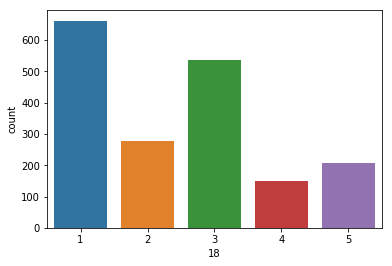

1    662
3    535
2    279
5    208
4    150
Name: 18, dtype: int64


In [30]:
X_test = test.iloc[:, 0:18]
y_test = test.iloc[:, 18]
print('shape of X {}; shape of y {}'.format(X_test.shape, y_test.shape))

# 绘制计数直方图
sns.countplot(y_test)
plt.show()
# 使用pd.Series.value_counts()
print(y_test.value_counts())

In [31]:
X_test_scaled = scaler.transform(X_test)

In [32]:
X_test_scaled[:5]

array([[-0.28836459,  0.39139532,  0.17911624, -0.66630972,  0.37911281,
         0.34815302, -0.87230726, -1.0875461 ,  0.43279882, -0.91768708,
        -1.61309962,  0.38688639, -0.3669948 ,  0.37806649,  0.18088929,
        -0.65648463,  0.35668088,  0.42331583],
       [-0.28836521,  0.39142086,  0.17912754, -0.66640515,  0.37908415,
         0.34828357, -0.87237054, -1.08750232,  0.43285196, -0.91779768,
        -1.61325387,  0.38698644, -0.36702156,  0.37813415,  0.18089636,
        -0.65651322,  0.35664789,  0.42340045],
       [-0.28836147,  0.39145005,  0.17914223, -0.66649487,  0.37905299,
         0.34841532, -0.87243383, -1.08745929,  0.43290676, -0.91788594,
        -1.61342891,  0.38709026, -0.36704568,  0.37821039,  0.18090225,
        -0.65654148,  0.35661164,  0.42348886],
       [-0.28835992,  0.39147605,  0.17915692, -0.66651978,  0.37881588,
         0.34860936, -0.87250854, -1.08743318,  0.43297152, -0.91797802,
        -1.61360048,  0.3871903 , -0.36706881,  0.378

In [33]:
y_testOneHot = np_utils.to_categorical(y_test)

In [34]:
test_scores = model.evaluate(X_test_scaled, y_testOneHot)
print()
print('accuracy=', test_scores[1])

1834/1834 [==============================] - 0s 63us/step

accuracy= 0.5654307524536533
